# RBF Approximators
In this example, we run some random feature maps for shift-invariant kernels, especially the RBF kernel.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC, LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.utils import shuffle
import numpy as np

In [ ]:
a9a = fetch_openml('a9a')
X, y = a9a.data, a9a.target
random_state = np.random.RandomState(0)
X, y = shuffle(X, y, random_state=random_state)

# undersampling
pos_indices = np.where(y > 0)[0]
neg_indices = np.where(y < 0)[0]
indices = np.sort(np.append(pos_indices, neg_indices[:len(pos_indices)]))
X, y = X[indices], y[indices]
X, y = shuffle(X, y, random_state=random_state)

# train/test split
n_train = int(0.8 * X.shape[0])
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test = X[n_train:], y[n_train:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
# standarize
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=False)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Comparison of the accuracy and training/testing time among `SVC` with RBF kernel and `LinearSVC` with random feature

 - `RBFSampler` (=`RandomFourier`)
 - `OrthogonalRandomFeature`
 - `FastFood`
 - `StructuredOrthogonalRandomFeature`
 - `SignedCirculantRandomMatrix` 
 - Higher score is better
 - Lower time is better
 - Unfortunately, structured random features are not so fast since the number of features is small (=123)

In [ ]:
%%time
# Non-linear SVC
svc = SVC(kernel='rbf', gamma=0.001, random_state=0)
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))

In [ ]:
%%time
# LinearSVC with RBFSampler
transformer = RBFSampler(n_components=1024, gamma=0.001, random_state=0)
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
clf = LinearSVC(dual=False, C=1)
clf.fit(X_train_trans, y_train)
print(clf.score(X_test_trans, y_test))

In [ ]:
from pyrfm import RandomFourier, FastFood, SignedCirculantRandomMatrix
from pyrfm import OrthogonalRandomFeature, StructuredOrthogonalRandomFeature

In [ ]:
%%time
# LinearSVC with RandomFourier with use_offset=False (Z=(cos, sin, cos, sin, ...))
transformer = RandomFourier(n_components=1024, gamma=0.001, use_offset=False,
                            random_state=0)
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
clf = LinearSVC(dual=False, C=1)
clf.fit(X_train_trans, y_train)
print(clf.score(X_test_trans, y_test))

In [ ]:
%%time
# LinearSVC with RandomFourier with use_offset=True (Z=(cos, cos, ...))
transformer = RandomFourier(n_components=1024, gamma=0.001, use_offset=True,
                            random_state=0)
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
clf = LinearSVC(dual=False, C=1)
clf.fit(X_train_trans, y_train)
print(clf.score(X_test_trans, y_test))

In [ ]:
%%time
# LinearSVC with OrthogonalRandomFeature 
transformer = OrthogonalRandomFeature(n_components=1024, gamma=0.001, 
                                      random_state=0)
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
clf = LinearSVC(dual=False, C=1)
clf.fit(X_train_trans, y_train)
print(clf.score(X_test_trans, y_test))

In [ ]:
%%time
# LinearSVC with OrthogonalRandomFeature 
transformer = OrthogonalRandomFeature(n_components=1024, gamma=0.001, 
                                      random_state=0, use_offset=True)
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
clf = LinearSVC(dual=False, C=1)
clf.fit(X_train_trans, y_train)
print(clf.score(X_test_trans, y_test))

In [ ]:
%%time
# LinearSVC with StructuredOrthogonalRandomFeature
transformer = StructuredOrthogonalRandomFeature(n_components=1024, gamma=0.001, 
                                                random_state=0)
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
clf = LinearSVC(dual=False, C=1)
clf.fit(X_train_trans, y_train)
print(clf.score(X_test_trans, y_test))

In [12]:
%%time
# LinearSVC with FastFood
transformer = FastFood(n_components=1024, gamma=0.001, random_state=0,
                       random_fourier=True)
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
clf = LinearSVC(dual=False, C=1)
clf.fit(X_train_trans, y_train)
print(clf.score(X_test_trans, y_test))

0.8228877005347593
CPU times: user 5.7 s, sys: 516 ms, total: 6.22 s
Wall time: 6.22 s


In [13]:
%%time
# LinearSVC with SignedCirculantRandomMatrix
transformer = SignedCirculantRandomMatrix(n_components=1024, gamma=0.001, random_state=0,
                                          random_fourier=True)
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
clf = LinearSVC(dual=False, C=1)
clf.fit(X_train_trans, y_train)
print(clf.score(X_test_trans, y_test))

/mnt/c/Users/kyohei/home_ubuntu/.local/share/virtualenvs/pipenv3.7.4-rkmnVTJV/lib/python3.7/site-packages/pyrfm-1.0.0-py3.7-linux-x86_64.egg/pyrfm/random_feature/signed_circulant_random_projection.py:130: UserWarning: n_components is changed from 1024 to 1230. You should set n_components n-tuple of the n_features.
  .format(self.n_components, n_components))


0.8220320855614973
CPU times: user 8.33 s, sys: 844 ms, total: 9.17 s
Wall time: 8.96 s


In [14]:
import timeit

### Comparison of the transform times on relativey high-dimensional data among `RBFSampler`, `StructuredOrthogonalRandomFeature`, `Fastfood`, and `SignedCirculantRandomMatrix`
 - Generate datasets with various number of features
 - Lower is better
 - `RBFSampler` (=`RandomFourier`): Linear time
 - Others: Log time


In [15]:
rbf_times = []
fastfood_times = []
struc_times = []
signed_times = []

n_samples = 2**14
n_components = 8192
n_trials = 5
for n_features in [256, 512, 1024, 2048, 4096]:
    print("n_features: {}".format(n_features))
    X_synthesis = np.random.randn(n_samples, n_features)

    rbf = RBFSampler(n_components=n_components)
    result = timeit.timeit("rbf.fit_transform(X_synthesis)", 
                           number=n_trials, globals=globals())
    result /= n_trials
    rbf_times += [result]
    print("RBFSampler: {}".format(result))
    
    struc = StructuredOrthogonalRandomFeature(n_components=n_components)
    result = timeit.timeit("struc.fit_transform(X_synthesis)", 
                           number=n_trials, globals=globals())
    result /= n_trials
    struc_times += [result]
    print("StructuredOrthogonalRandomFeature: {}".format(result))
        
    fastfood = FastFood(n_components=n_components)
    result = timeit.timeit("fastfood.fit_transform(X_synthesis)", 
                           number=n_trials, globals=globals())
    result /= n_trials
    fastfood_times += [result]
    print("FastFood: {}".format(result))

    signed = SignedCirculantRandomMatrix(n_components=n_components)
    result = timeit.timeit("signed.fit_transform(X_synthesis)", 
                           number=n_trials, globals=globals())
    result /= n_trials
    signed_times += [result]
    print("SignedCirculantRandomFeature: {}".format(result))
    print()

print("RBFSampler: {}".format(rbf_times))
print("StructuredOrthogonalRandomFeature: {}".format(struc_times))
print("FastFood: {}".format(fastfood_times))
print("SignedCirculantRandomMatrix: {}".format(signed_times))

n_features: 256
RBFSampler: 6.093467640000017
StructuredOrthogonalRandomFeature: 7.078550559999985
FastFood: 6.570585600000004
SignedCirculantRandomFeature: 12.383045719999973

n_features: 512
RBFSampler: 7.353441720000001
StructuredOrthogonalRandomFeature: 7.262238579999985
FastFood: 6.620491459999994
SignedCirculantRandomFeature: 12.47048420000001

n_features: 1024
RBFSampler: 9.63190840000002
StructuredOrthogonalRandomFeature: 7.149680560000024
FastFood: 6.596731799999998
SignedCirculantRandomFeature: 12.81946767999998

n_features: 2048
RBFSampler: 14.848115839999991
StructuredOrthogonalRandomFeature: 7.342096059999994
FastFood: 6.639268979999997
SignedCirculantRandomFeature: 13.611048720000008

n_features: 4096
RBFSampler: 26.442517420000012
StructuredOrthogonalRandomFeature: 7.2083950400000045
FastFood: 6.687563479999971
SignedCirculantRandomFeature: 16.579174780000038

RBFSampler: [6.093467640000017, 7.353441720000001, 9.63190840000002, 14.848115839999991, 26.442517420000012]
Str

In [16]:
import matplotlib.pyplot as plt

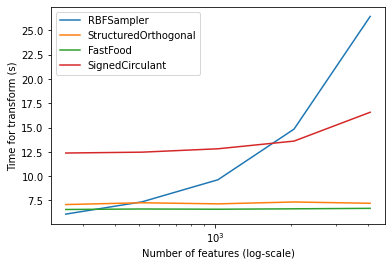

In [17]:
%matplotlib inline
list_n_features = [256, 512, 1024, 2048, 4096]
plt.plot(list_n_features, rbf_times, label='RBFSampler')
plt.plot(list_n_features, struc_times, label='StructuredOrthogonal')
plt.plot(list_n_features, fastfood_times, label='FastFood')
plt.plot(list_n_features, signed_times, label='SignedCirculant')
plt.legend()
plt.xlabel("Number of features (log-scale)")
plt.ylabel("Time for transform (s)")
plt.xscale('log')
plt.show()